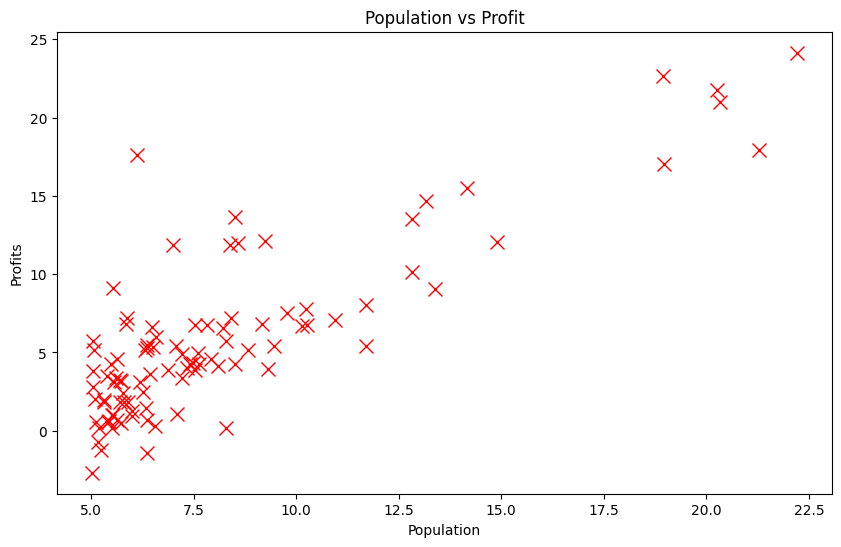

In [2]:
# 导入必备库
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#读取数据
path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population','Profits'])
X = data['Population'].values
y = data['Profits'].values
m = len(y)
#绘制
plt.figure(figsize = (10,6))
plt.plot(X,y,'rx',markersize = 10)
plt.xlabel('Population')
plt.ylabel('Profits')
plt.title('Population vs Profit')
plt.show()



In [3]:
X = np.hstack((np.ones((m,1)), X.reshape(-1,1)))  # 最终shape=(97,2)

# 2. 初始化参数θ：全0向量，形状(2,)，对应θ₀和θ₁
theta = np.zeros(2)

# 3. 设置梯度下降超参数（作业默认值，固定不变）
alpha = 0.01         # 学习率
iterations = 1500    # 迭代次数


In [4]:
def computeCost(X,y,theta):
    m = len(y)
    h = X @ theta
    J = (1 / (2*m)) * np.sum((h - y)**2)
    return J

initial_J = computeCost(X,y,theta)
print(f"J(0) = {initial_J:.2f}")



J(0) = 32.07


In [5]:
def gradientDescent(X, y, theta, alpha, iterations):

    m = len(y)
    # 初始化代价历史数组
    J_history = np.zeros(iterations)

    for i in range(iterations):

        h = X @ theta
        theta = theta - (alpha / m) * (X.T @ (h - y))
        J_history[i] = computeCost(X, y, theta)

    return theta, J_history

# 运行梯度下降，求解最优θ
theta_opt, J_history = gradientDescent(X, y, theta, alpha, iterations)
# 作业预期值：θ₀≈-3.6303，θ₁≈1.1664
print(f"最优参数θ：θ₀ = {theta_opt[0]:.4f}, θ₁ = {theta_opt[1]:.4f}")

最优参数θ：θ₀ = -3.6303, θ₁ = 1.1664


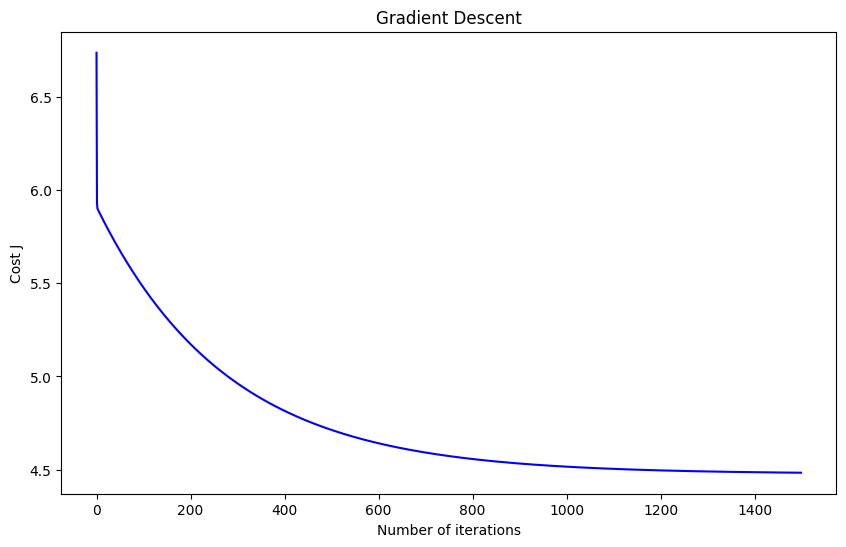

In [6]:
plt.figure(figsize = (10,6))
plt.plot(range(iterations),J_history,'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Gradient Descent')
plt.show()


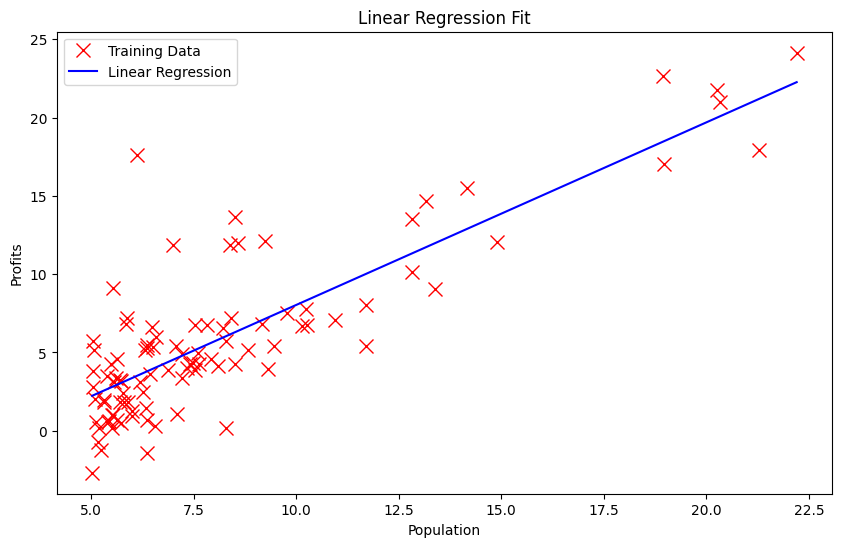

In [7]:
plt.figure(figsize = (10,6))
plt.plot(data['Population'],data['Profits'],'rx',markersize = 10,label = 'Training Data')
x_plot = np.linspace(min(data['Population']),max(data['Population']),100)
y_plot = theta_opt[0] + theta_opt[1]*x_plot
plt.plot(x_plot,y_plot,'b-',label = 'Linear Regression')
plt.xlabel('Population')
plt.ylabel('Profits')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()



In [8]:
x1 = np.array([1,3.5])
x2 = np.array([1,7.0])
predict1 = x1 @ theta_opt
predict2 = x2 @ theta_opt


print(f'35000 Predicted Profits = {predict1:.2f}')
print(f'70000 Predicted Profits = {predict2:.2f}')


35000 Predicted Profits = 0.45
70000 Predicted Profits = 4.53


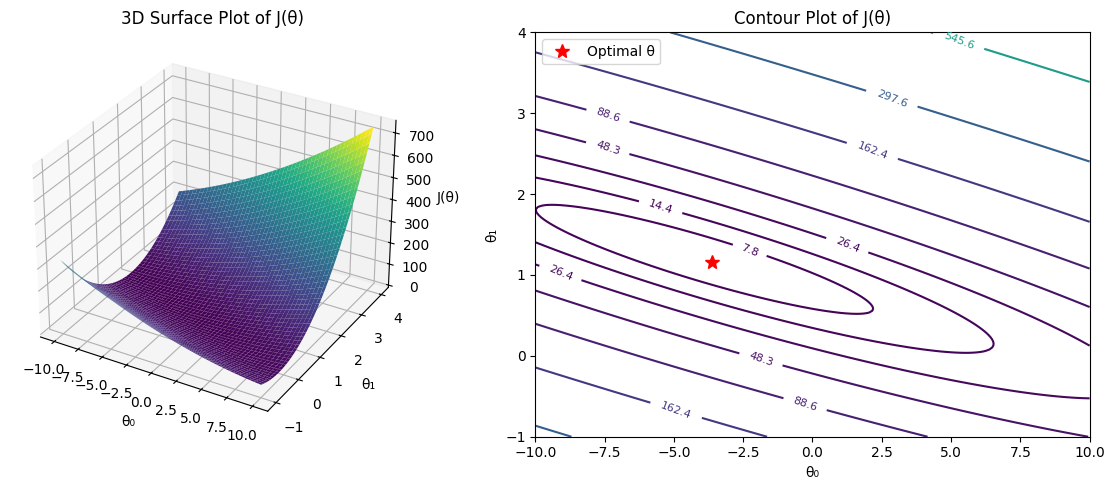

In [9]:
  from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图库

# 1. 生成θ₀和θ₁的网格数据，步长0.1，覆盖指定范围
theta0_vals = np.linspace(-10, 10, 200)
theta1_vals = np.linspace(-1, 4, 200)
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# 2. 计算每个网格点的J(θ)值
J_vals = np.zeros(theta0.shape)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[j, i] = computeCost(X, y, t)

# 3. 绘制3D曲面图
fig = plt.figure(figsize=(12,5))
# 子图1：3D曲面
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(theta0, theta1, J_vals, cmap='viridis')  # 彩色曲面
ax1.set_xlabel('θ₀')
ax1.set_ylabel('θ₁')
ax1.set_zlabel('J(θ)')
ax1.set_title('3D Surface Plot of J(θ)')

# 4. 绘制等高线图，并标注最优参数
ax2 = fig.add_subplot(122)
# 绘制等高线，levels指定等高线数量，cmap指定颜色
contour = ax2.contour(theta0, theta1, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
# 标注最优参数θ_opt，红色五角星标记，大小100
ax2.plot(theta_opt[0], theta_opt[1], 'r*', markersize=10, label='Optimal θ')
ax2.set_xlabel('θ₀')
ax2.set_ylabel('θ₁')
ax2.set_title('Contour Plot of J(θ)')
ax2.legend()
plt.tight_layout()  # 调整子图间距
plt.show()


In [10]:
def normalEquation(X, y):

    # 正规方程公式：θ = (X^T X)⁻¹ X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# 求解最优参数
theta_normal = normalEquation(X, y)
print(f"正规方程最优参数：θ₀ = {theta_normal[0]:.4f}, θ₁ = {theta_normal[1]:.4f}")
print(f"梯度下降最优参数：θ₀ = {theta_opt[0]:.4f}, θ₁ = {theta_opt[1]:.4f}")

# 用正规方程参数重新预测
predict1_normal = np.array([1, 3.5]) @ theta_normal
predict2_normal = np.array([1, 7.0]) @ theta_normal
print(f"\n正规方程预测3.5万人口利润：{predict1_normal:.2f}")
print(f"正规方程预测7.0万人口利润：{predict2_normal:.2f}")

正规方程最优参数：θ₀ = -3.8958, θ₁ = 1.1930
梯度下降最优参数：θ₀ = -3.6303, θ₁ = 1.1664

正规方程预测3.5万人口利润：0.28
正规方程预测7.0万人口利润：4.46
